<a href="https://colab.research.google.com/github/Imran123885/Harvard_AI_Bootcamp_Work/blob/main/imran_mirza_d2c1vc_nlp_classification_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Classification
Harvard AI Bootcamp

## Make a copy of this notebook! Editing directly will not be saved.

You will be working on a dataset of "documents," short text strings encompassing comments, statements, tweets, etc. Each document is paired with its emotion, e.g. "I love AI!" is paired with "joy." You could think of these as short tweets.

To begin, download the dataset from https://drive.google.com/file/d/10s1fJPzTOQQ1n84rUVaVMrR4MkuuUIiL/view

The dataset is formatted as a .csv file, with documents under the "Comment" column and emotions under the "Emotion" column. Each row represents one document and its emotion. Upload this in the files section on the left of your Colab notebook.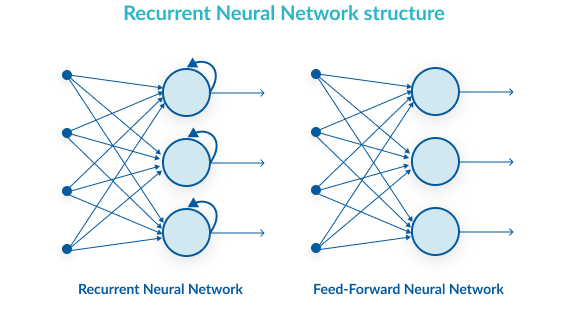

In [ ]:
#Load the data as a Pandas dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('emotions.csv')

In [ ]:
df.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


## Part A: Exploratory Analysis and Visualizations

Before looking for relationships, get a general idea of the shape of the dataset. Explore the data to gain an understanding of the variables that exist. To help guide you through the process, here are a few questions to get started.

What is the shape of the data? How many documents and unique emotions are there? How many documents per unique emotion? \\


In [ ]:
# TODO
df.shape

(20000, 2)

In [ ]:
# TODO
emotions_unique = np.unique(df['Emotion'])
print(emotions_unique)
df['Emotion'].value_counts()

['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

What are the 5 most common words per emotion? Most common 2-letter combo? 3-letter combo? Write a function to find the most common n-word combination for a particular emotion.



In [ ]:
# Imports from nltk, an nlp library.
import nltk
from collections import Counter
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')


# i am him. n = 1, unigram(look at each word one at a time) n = 2, bigram(look at 2 words same time), etc

# Tokenizer = turns sentence into tokens, something that comps can understand

def most_common_ngrams(emotion, n):
    text = ' '.join(df[df['Emotion'] == emotion]['Comment'].tolist())
    print(text)
    words = word_tokenize(text)
    print(words)
    words = [word.lower() for word in words if word.isalpha()]
    print(words)
    if n ==1:
        return Counter(words).most_common(5)
    elif n == 2:
        return Counter(bigrams(words)).most_common(5)
    else:
        return Counter(trigrams(words)).most_common(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
most_common_ngrams('joy', 1)

i have been with petronas for years i feel that petronas has performed well and made a huge profit i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious i do not feel reassured anxiety is on each side i have the feeling she was amused and delighted i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me i feel more superior dead chicken or grieving child i get giddy over feeling elegant in a perfectly fitted pencil skirt i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex

[('i', 10727), ('feel', 4942), ('and', 4143), ('to', 4072), ('the', 3767)]

In [ ]:
for emotion in df['Emotion'].unique():
  print(emotion)
  for i in range(3):
    print(most_common_ngrams(emotion, i))

sadness
[(('i', 'feel', 'like'), 468), (('i', 'feel', 'so'), 264), (('feel', 'like', 'i'), 193), (('i', 'was', 'feeling'), 166), (('i', 'am', 'feeling'), 143)]
[('i', 9440), ('feel', 4079), ('and', 3372), ('to', 2935), ('the', 2682)]
[(('i', 'feel'), 2568), (('i', 'am'), 637), (('feel', 'like'), 618), (('i', 'was'), 516), (('that', 'i'), 457)]
anger
[(('i', 'feel', 'like'), 236), (('i', 'was', 'feeling'), 101), (('feel', 'like', 'i'), 93), (('i', 'am', 'feeling'), 89), (('i', 'feel', 'so'), 83)]
[('i', 4484), ('feel', 1796), ('and', 1584), ('to', 1449), ('the', 1403)]
[(('i', 'feel'), 1147), (('i', 'am'), 317), (('feel', 'like'), 305), (('i', 'was'), 270), (('that', 'i'), 218)]
love
[(('i', 'feel', 'like'), 183), (('feel', 'like', 'i'), 60), (('i', 'feel', 'that'), 58), (('i', 'feel', 'so'), 45), (('i', 'am', 'feeling'), 43)]
[('i', 2641), ('feel', 1180), ('and', 1119), ('to', 1049), ('the', 969)]
[(('i', 'feel'), 727), (('feel', 'like'), 235), (('i', 'am'), 185), (('that', 'i'), 144),

A lot of meaningless words! "i', 'and', 'me', etc. These are called **stop words**. These are words to be filtered out before analyzing natural language, because they are meaningless. Stop words are predefined lists of words to be filtered out. Let's use nltk's list of stop words to rewrite our function. Let's also add our own stop words: "feel", "im", "feeling".

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add("feel")
stop_words.add("feeling")
stop_words.add("im")

def most_common_ngrams(emotion, n, df):
    text = ' '.join(df[df['Emotion'] == emotion]['Comment'].tolist())
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    if n ==1:
        return Counter(words).most_common(5)
    elif n == 2:
        return Counter(bigrams(words)).most_common(5)
    else:
        return Counter(trigrams(words)).most_common(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for emotion in df['Emotion'].unique():
  print(emotion)
  for i in range(3):
    print(most_common_ngrams(emotion, i, df))

sadness
[(('href', 'http', 'www'), 14), (('img', 'src', 'http'), 10), (('like', 'damaged', 'goods'), 9), (('rel', 'nofollow', 'target'), 6), (('nofollow', 'target', 'blank'), 6)]
[('like', 1064), ('really', 349), ('know', 339), ('get', 284), ('ive', 266)]
[(('href', 'http'), 64), (('dont', 'know'), 40), (('even', 'though'), 34), (('feels', 'like'), 29), (('cant', 'help'), 28)]
anger
[(('like', 'heartless', 'bitch'), 5), (('like', 'cant', 'bothered'), 4), (('give', 'lot', 'change'), 3), (('couldnt', 'help', 'little'), 3), (('href', 'http', 'www'), 3)]
[('like', 475), ('really', 165), ('get', 150), ('know', 148), ('people', 144)]
[(('feels', 'like'), 16), (('href', 'http'), 16), (('little', 'bit'), 15), (('dont', 'know'), 14), (('cant', 'help'), 13)]
love
[(('href', 'http', 'www'), 10), (('know', 'feels', 'like'), 4), (('like', 'naughty', 'child'), 3), (('one', 'moments', 'want'), 2), (('bit', 'nostalgic', 'decided'), 2)]
[('like', 393), ('love', 119), ('really', 112), ('know', 101), ('s

For each emotion, can you plot a histogram of its documents' lengths? Do you observe any relationships?

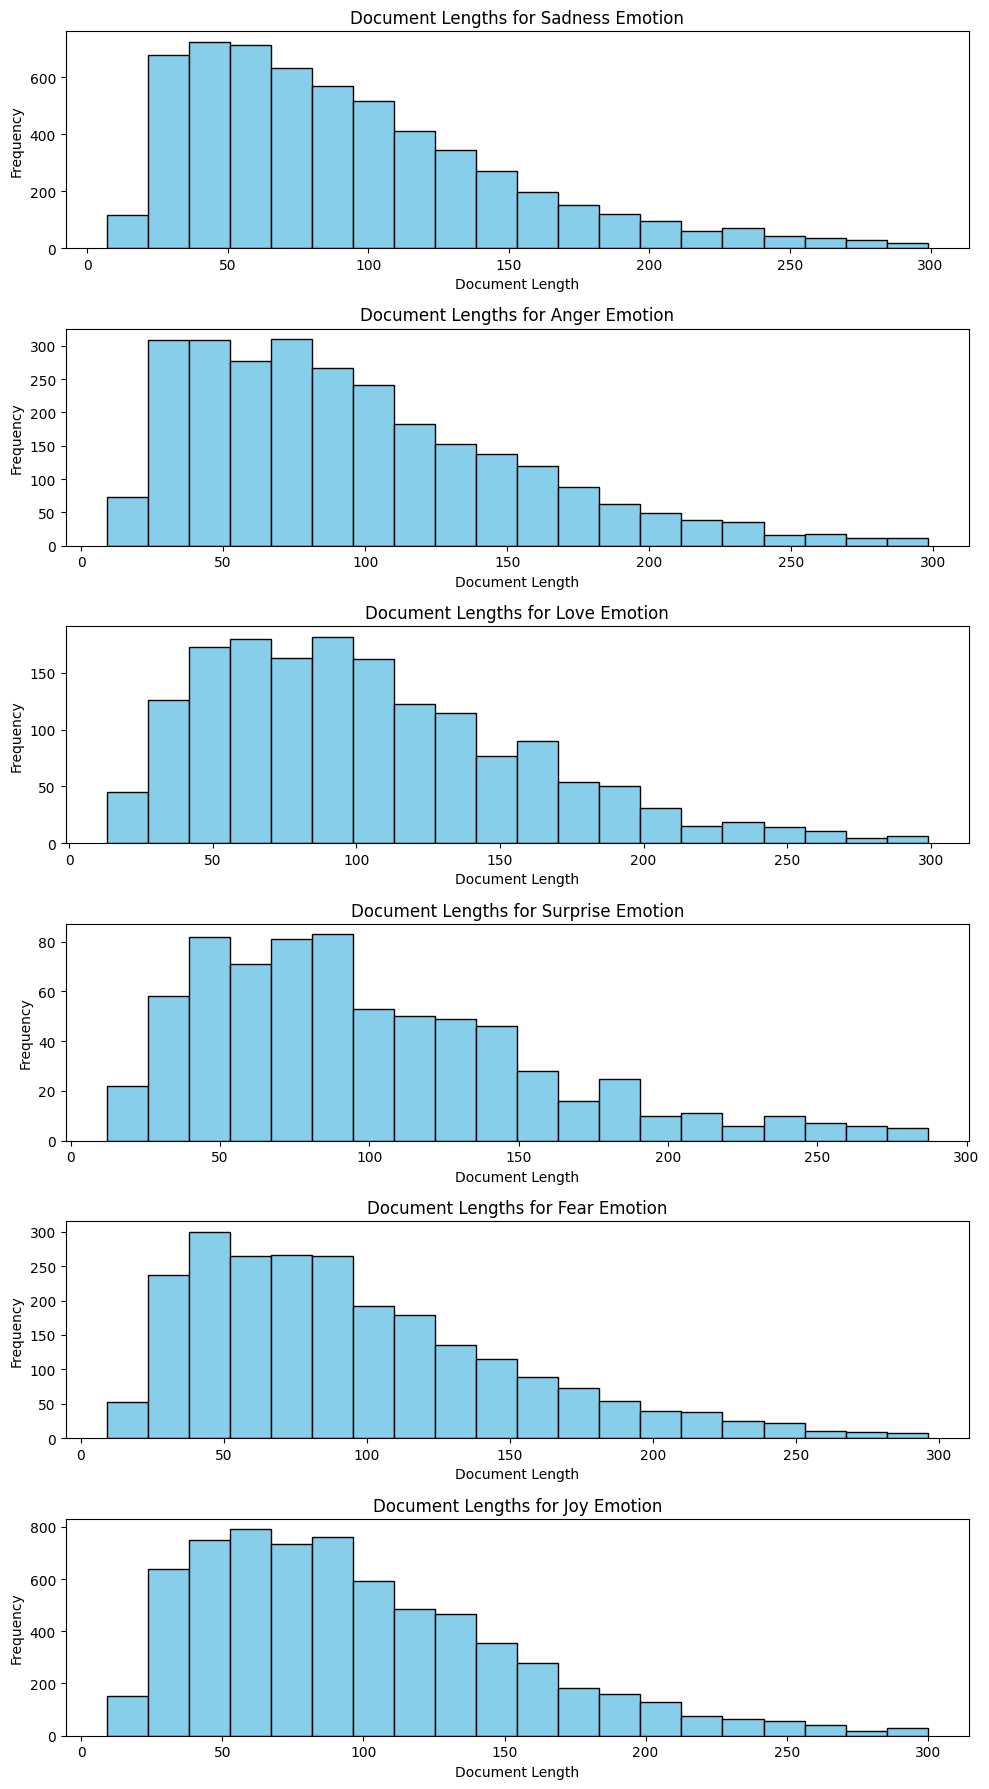

In [ ]:
import matplotlib.pyplot as plt

df['Length'] = df['Comment'].apply(len)
emotions = df['Emotion'].unique()
num_emotions = len(emotions)
fig, axes = plt.subplots(num_emotions, 1, figsize=(10, num_emotions * 3))

for i, emotion in enumerate(emotions):
    axes[i].hist(df[df['Emotion'] == emotion]['Length'], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Document Lengths for {emotion.capitalize()} Emotion')
    axes[i].set_xlabel('Document Length')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Part B: Modeling

### Data split
Split our data into 80% train, 20% test.

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Comment']
y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hand Engineered Features

Let's start with hand-engineered features for our modeling. For each document, we'll create the following features to input into a linear regression.

*italicized text*

*   Presence of a word in the top 5 words-list of any emotion
*   Document length



With 6 emotions, this will be $5*6 + 1=31$ max features across 20,000 samples (only if each top 5 set of words per emotion are unique).

We'll need to recompute the most common words and bigrams on our training data. What's wrong with using our original features calculated on the entire dataset?

In [ ]:
from tqdm import tqdm

train_df = pd.DataFrame({'Comment': X_train, 'Emotion': y_train})

# Compute the most common words for each emotion in the training data
emotion_common_words = {}
for emotion in train_df['Emotion'].unique():
    emotion_common_words[emotion] = most_common_ngrams(emotion, 1, train_df)

# Extracting just the words from the most common words
for emotion in emotion_common_words:
    emotion_common_words[emotion] = [word for word, count in emotion_common_words[emotion]]

# Featurizing train and test data
def featurize_data(data, common_words):
    features = pd.DataFrame()
    for emotion, words in tqdm(common_words.items()):
        for word in words:
            feature_name = f"{word}"
            features[feature_name] = data.apply(lambda comment: word in word_tokenize(comment.lower()))
    return features

X_train_features = featurize_data(X_train, emotion_common_words)
X_test_features = featurize_data(X_test, emotion_common_words)

X_train_features.head()

100%|██████████| 6/6 [00:14<00:00,  2.38s/it]


,like,really,time,get,know,ive,little,bit,people,love,loving,amazed,funny,curious,impressed
5894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8958,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7671,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
5999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Now add a column corresponding to document length

In [ ]:
# TODO
X_train_features['doc length'] = X_train.apply(len)
X_test_features['doc length'] = X_test.apply(len)
# X_train_features = X_train_features.drop('doc length', axis=1)
# X_test_features = X_test_features.drop('doc_length', axis=1)
# X_train_features = X_train_features.drop('doc_length', axis=1)

Now, train a logistic regression to predict emotion from these precomputed features. Evaluate accuracy on train and test sets.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training a Logistic Regression model
# TODO
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_features, y_train)

# Making predictions
y_train_preds = clf.predict(X_train_features)
y_test_preds = clf.predict(X_test_features)

# Computing accuracies
train_accuracy = accuracy_score(y_train, y_train_preds)
test_accuracy = accuracy_score(y_test, y_test_preds)

# Creating a DataFrame to store the accuracies
accuracy_df = pd.DataFrame({
    "Model": ["Logistic Regression"],
    "Train Accuracy": [train_accuracy],
    "Test Accuracy": [test_accuracy]
})

accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.366375,0.36375


That's alright, especially considering the simplicity of the regression, our precomputed features, and the multiclass nature of our task. This is just a baseline though - let's try and do better!

### TF-IDF

Term Frequency - Inverse Document Frequency (TF-IDF) is a method to measure the importance of a particular word in each document, relative to a wider corpus of text (our entire dataset). The metric measures both term frequency (how often the term appears in the document) and inverse document frequency (the most frequent words like "is" "of" "that" have less meaning than the rarer words like "happy").

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create a TF-IDF vectorizer and Logistic Regression pipeline
# TODO
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=1000)),
])

In [ ]:
# Train the pipeline on the training data
# TODO
tfidf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [ ]:
# Making predictions
y_train_pred_tfidf = tfidf_pipeline.predict(X_train)
y_test_pred_tfidf = tfidf_pipeline.predict(X_test)

In [ ]:
# Computing accuracies
train_accuracy_tfidf = accuracy_score(y_train, y_train_pred_tfidf)
test_accuracy_tfidf = accuracy_score(y_test, y_test_pred_tfidf)

In [ ]:
# Adding the TF-IDF accuracies to the DataFrame
accuracy_df = accuracy_df.append({
    "Model": "TF-IDF + Logistic Regression",
    "Train Accuracy": train_accuracy_tfidf,
    "Test Accuracy": test_accuracy_tfidf
}, ignore_index=True)

accuracy_df

<ipython-input-21-2a4b6672ccab>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append({


,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.366375,0.36375
1,TF-IDF + Logistic Regression,0.937937,0.85775


### Word Embeddings

Word embeddings are a technique for transforming text data into numerical, vectorized form. One popular approach is Word2Vec, which creates vector representations of words by leveraging the surrounding context to capture semantic and syntactic relationships between words in a text corpus.

On a more granular level, Word2Vec works by utilizing a shallow neural network to learn the vector representations of words.

Given a target word, it aims to predict the context words around it. The model learns by minimizing the difference between the predicted probability distributions and the true one-hot encoded context word vectors.

These embeddings are capable of encoding various linguistic properties, such as semantic similarity, analogies, and even some grammatical relationships.


In [ ]:
# Library to load word2vec
!pip install gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

# Example of loading a pr    e-trained Word2Vec model (adjust the file path as needed)
# model = KeyedVectors.load_word2vec_format('path_to_word2vec_model.bin', binary=True)

# If you want to train a Word2Vec model on your data:
# TODO
sentences = [text.split() for text in X_train]
model = Word2Vec(sentences, vector_size=100, window =5, min_count=1, workers=4)
# Function to create a document vector by averaging word vectors
def document_vector(word2vec_model, doc):
    # Remove out-of-vocabulary words
    stop_words = set(stopwords.words('english'))
    stop_words.add("feel")
    stop_words.add("feeling")
    stop_words.add("im")


def most_common_ngrams(emotion, n, df):
    text = ' '.join(df[df['Emotion'] == emotion]['Comment'].tolist())
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    if n == 1:
      return Counter(words).most_common(5)
    elif n == 2:
      return Counter(bigrams(words)).most_common(5)
    else:
      return Counter(trigrams(words)).most_common(5)

# Apply the function to your text data
doc_vec_mean = document_vector(model, sentences)

# Now you can use X_train_vectors and X_test_vectors for machine learnin

AttributeError: ignored

In [ ]:
# 100 features
X_train_vectors.shape

NameError: ignored

Now it's easy to train a logistic regression with our tabular data.

In [ ]:
# Assuming X_train_vectors and X_test_vectors are already created using Word2Vec embeddings

# Training a Logistic Regression model
# TODO


# Making predictions


# Computing accuracies
train_accuracy_w2v..
test_accuracy_w2v..

# Adding the Word2Vec + Logistic Regression accuracies to the DataFrame
accuracy_df.loc[len(accuracy_df)] = ["Word2Vec + Logistic Regression", train_accuracy_w2v, test_accuracy_w2v]

accuracy_df



It's pretty bad! How come?

In [ ]:
df['Emotion'].value_counts()

Remember that the data is very imbalanced - 'surprise' only has 719 data points. Word2Vec can't collect the semantic and syntactic of words properly, and it needs large training data to learn the word representation. TF-IDF on the other hand is effective even with a small number of data.

### Recurrent Neural Network

RNNs are deep neural networks with recurrent connections, meaning that they allow the output from certain nodes to affect the *input* into the same node (not just the next node as in a typical forward neural network). They can use internal memory to process arbitrary input sequences, which lends well to text data.

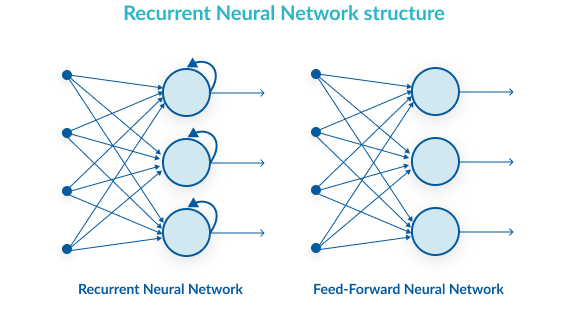

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import torch.nn as nn
import torch.optim as optim

# Assume X_train, X_test, y_train, y_test are already defined with text data and labels

# Tokenization and Vocabulary Building
tokenizer = get_tokenizer('basic_english')
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(X_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Assuming y_train contains categorical labels
unique_labels = set(y_train)
label_to_index = {label: index for index, label in enumerate(unique_labels)}

# Text and Label Processing
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda label: label_to_index[label]

# Convert datasets to TensorDatasets
def process_data(X, y):
    # TODO

train_dataset = process_data(X_train, y_train)
test_dataset = process_data(X_test, y_test)

# Create DataLoaders
# TODO

# Define a simple RNN model
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(SimpleRNN, self).__init__()
        # TODO

    def forward(self, x):
        # TODO

# Instantiate the model
model = SimpleRNN(len(vocab), embed_dim=100, hidden_dim=256, output_dim=len(set(y_train)))

# Loss and Optimizer
criterion..
optimizer..

# Training Loop
for epoch in tqdm(range(1)):  # Number of epochs
    for text, labels in tqdm(train_loader):
        # TODO

# Evaluate the model
model.eval()
total_accuracy = 0
with torch.no_grad():
    for text, labels in test_loader:
        output = model(text)
        total_accuracy += (output.argmax(1) == labels).float().mean().item()
accuracy = total_accuracy / len(test_loader)
print(f"Test Accuracy: {accuracy}")


In [ ]:
# Evaluate the model on training data
model.eval()
train_total_accuracy = 0
with torch.no_grad():
    for text, labels in train_loader:
        output = model(text)
        train_total_accuracy += (output.argmax(1) == labels).float().mean().item()
train_accuracy = train_total_accuracy / len(train_loader)

# Append to DataFrame
accuracy_df.loc[len(accuracy_df)] = ["Simple RNN", train_accuracy, accuracy]

accuracy_df

Not that good, but we only trained for 1 epoch and this is a very simple RNN.

In [ ]:
df['Emotion'].value_counts()

Consider if we predicted everything as "joy". What's our accuracy?

In [ ]:
# TODO